# Aula 7 - Extração de dados de fontes remotas para visualização e análise

<center>
<img src="./images/extracting-insights-from-data.jpg" alt="drawing" width="700px"></center>

# Expectativas

<center>
<img src="./images/expectations.jpg" alt="drawing" width="700px"></center>

**Intrutora:** Patrícia Pampanelli (@patriciapampanelli no Slack)

**Experiência:**
- Cientista da Computação (UFJF)
- Mestre em Modelagem Computacional (UFJF)
- Doutora em Processamento de Imagens e Visão Computacional (PUC-Rio)
- Sênior Data Scientist - Grupo ZAP


**Interesses:**
- Carros Autônomos <img src="./images/car.png" alt="drawing" width="80px"> 
- Visão Computacional <img src="./images/eye.png" alt="drawing" width="80px">
- Processamento de Linguagem Natural <img src="./images/text.png" alt="drawing" width="80px">
- Intelligent Video Analytics <img src="./images/camera.jpg" alt="drawing" width="80px">

# Até agora... CSV

<img src="./images/receive_data.png" alt="drawing" width="400px">

# E se não temos um CSV?! Como extrair?? Soluções?

<p align="center">
<img src="./images/interrogation.jpg" alt="drawing" width="400px">
</p>

# Soluções: Banco de Dados e API (Application Programming Interface)

<table>
<tr>
<td> <img src="./images/database.png" width="300" height="300" /></td>  
<td> <img src="./images/api.png" width="300" height="300" /> </td> 
</tr>
</table>

# O que é uma API?

<center>
<video controls src="whats-is-an-api.mp4" size=10/></center>
Link: https://www.youtube.com/watch?v=s7wmiS2mSXY

# Dificuldades para se trabalhar com APIs

<img src="./images/difficulties.png" width="300" height="300" />

- Boas práticas ao se construir APIs são fundamentais!

- Dificuldades podem aparecer:
    - pouca documentação
    - mudança nas interfaces
    - dificuldade de processamento dos dados
    - falta de padronização no formato dos dados
    - indisponibilidade do serviço
    - etc

# Como são formadas as APIs REST

Podemos dizer que uma API é como se fosse uma página da web só que para computadores. Só eles conseguirem acessar, ler e interagir da maneira adequada com as APIs.

Como Data Scientists, vocês utilizarão APIs tanto internas (fornecidas pelas próprias empresas em que vocês trabalham) quanto externas.

APIs são uma das principais formas que um Data Scientist utiliza para obter os dados que devem ser analisados.

<center>
<img src="./images/data.gif" alt="drawing" width="600px"></center>

Como exemplo, ao acessarmos a API da Jsonplaceholder https://jsonplaceholder.typicode.com/posts/1, vemos o retorno abaixo, ao invés de uma página comum:

```python
{
  "userId": 1,
  "id": 1,
  "title": "sunt aut facere repellat provident occaecati excepturi optio reprehenderit",
  "body": "quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto"
}
```

Esse padrão de resposta é o que chamamos de JSON (*JavaScript Object Notation - Notação de Objetos JavaScript*), e este é o tipo de resposta mais comum entre as APIs.

Ele foi feito para que máquinas entendam seus dados e os utilizem como quiser.

# Como funciona o protocolo HTTP

A internet trafega através do protocolo **HTTP (*Hypertext Transfer Protocol*)**. O protocolo HTTP foi criado por **Tim Berners-Lee**, o criador da web, enquanto ele trabalhava na CERN em 1989 (sua equipe e ele também foram responsáveis pelo HTML).

O HTTP possui duas entidades básicas: a **Request (pedido)** e a **Response (resposta)**

Sempre que entramos em uma página, enviamos uma request para o servidor do site e esperamos uma response com o HTML da página.

Sempre que enviamos um ***Request (pedido)*** devemos especificar um método. A tabela abaixo cita os métodos mais comuns e explica brevemente o objetivo de cada um:

| Método |        Objetivo       |
|:------:|:---------------------:|
| GET    | Obter informações     |
| POST   | Salvar informações    |
| PUT    | Atualizar informações |
| DELETE | Deletar informações   |

Todos eles são comumente utilizados por APIs.

O método ***GET*** é o que seu navegador usa para baixar o HTML da página.

O metódo ***POST*** também é muito utilizado sempre que você envia algum formulário em um site.

Além do método, as requisições também possuem um **header**:

O **Header (cabeçalho)** tem a função de dizer para o servidor diversos dados sobre quem fez a solicitação. Dessa forma, o servidor consegue até permitir que você veja mais informações dependendo do seu nível de acesso.

Todos as respostas possuem, além do conteúdo da resposta, um código de status.

Os códigos de status (status code) seguem um padrão.

Os mais comuns são:

| Código |                                    Significado                                    |
|:------:|:---------------------------------------------------------------------------------:|
| 200    | Ok                                                                                |
| 3XX    | O servidor vai te redirecionar para outra URL                                     |
| 4XX    | O recurso não foi encontrado, não está mais disponível, etc                       |
| 5XX    | Algum problema aconteceu no servidor e ele não conseguiu processar a sua request  |

Outra característica das APIs REST é a **divisão dos recursos**. Por exemplo:

https://jsonplaceholder.typicode.com/users/1

Ao abrirmos esta URL estamos fazendo um GET para obtermos informações do usuário (/users) com código 1 (/1). Podemos trocar o código do usuário para buscar outros usuários.

Também podemos pedir todos os usuários digitando:

https://jsonplaceholder.typicode.com/users


Também é muito comum o uso de parâmetros na URL para passarmos **filtros para a API**. Por exemplo:

https://jsonplaceholder.typicode.com/comments?postId=1

Perceba o **"?postId=1"** ao final da URL.

Sempre que precisamos passar parâmetros, começamos com um ponto de interrogação (?) e depois utilizamos o & para parâmetros futuros. Por exemplo:

https://jsonplaceholder.typicode.com/comments?postId=1&id=3

# Como funciona o pacote Requests

Como vimos anteriormente, o pacote requests do Python é utilizado para nos comunicarmos com URLs.

Podemos realizar GET, POST, PUT, DELETE e quaisquer outros métodos HTTP com ele.

In [1]:
# Veja no exemplo abaixo como podemos fazer isso:

import requests
api = requests.get('https://jsonplaceholder.typicode.com/users')

json = api.json()

for user in json:
    print('{0} ({1}) - {2}'.format(user['name'], user['email'], user['website']))

Leanne Graham (Sincere@april.biz) - hildegard.org
Ervin Howell (Shanna@melissa.tv) - anastasia.net
Clementine Bauch (Nathan@yesenia.net) - ramiro.info
Patricia Lebsack (Julianne.OConner@kory.org) - kale.biz
Chelsey Dietrich (Lucio_Hettinger@annie.ca) - demarco.info
Mrs. Dennis Schulist (Karley_Dach@jasper.info) - ola.org
Kurtis Weissnat (Telly.Hoeger@billy.biz) - elvis.io
Nicholas Runolfsdottir V (Sherwood@rosamond.me) - jacynthe.com
Glenna Reichert (Chaim_McDermott@dana.io) - conrad.com
Clementina DuBuque (Rey.Padberg@karina.biz) - ambrose.net


# Como utilizar APIs com autenticação

É muito comum encontrarmos APIs que necessitam de autenticação. Isto é, algum identificador que diz para ela quem está requisitando aquela informação.

Para realizarmos autenticação em APIs REST nós normalmente utilizamos um Header e um Token de acesso.

Porém, algumas APIs também utilizam parâmetros para realizar a autenticação.

Abaixo vamos ver como acessar a API da NASA (https://api.nasa.gov/api.html#authentication) utilizando um token.

*Aviso para leitores do futuro: se essa key não funcionar, é só entrar no site da NASA e gerar uma nova digitando o seu e-mail.*

In [1]:
import requests

key = {'api_key': 'w7kB3neCQ3nKhTJ8RbX4tgDrWIhiSJl3EtOpcskT'}

api = requests.get('https://api.nasa.gov/planetary/apod', params=key)

json = api.json()

print(json['date'])
print(json['explanation'])

2019-07-15
That's no sunspot. It's the International Space Station (ISS) caught passing in front of the Sun. Sunspots, individually, have a dark central umbra, a lighter surrounding penumbra, and no solar panels.  By contrast, the ISS is a complex and multi-spired mechanism, one of the largest and most sophisticated machines ever created by humanity.  Also, sunspots occur on the Sun, whereas the ISS orbits the Earth.  Transiting the Sun is not very unusual for the ISS, which orbits the Earth about every 90 minutes, but getting one's timing and equipment just right for a great image is rare.  Strangely, besides that fake spot, in this recent two-image composite, the Sun  lacked any real sunspots.  The featured picture combines two images -- one capturing the space station transiting the Sun -- and another taken consecutively capturing details of the Sun's surface.  Sunspots have been rare on the Sun since the dawn of the current Solar Minimum, a period of low solar activity. For reasons

# Exercício - Extraindo Dados do CoinMarketCap via API

Vamos usar o pacote requests para o acessar a API do CoinMarketCap.

As instruções da API estão disponíveis em: https://sandbox.coinmarketcap.com/api/v1/#

Deveremos extrair os seguintes dados:

- Nome da moeda
- Preço atual
- O valor de mercado total
- O valor atual em circulação
- Percentual de mudança nas últimas 24 horas
- Também deveremos limitar para que a API traga apenas 5 moedas para trabalharmos

*Tempo: 10 minutos*

In [ ]:
from requests import Request, Session

headers = {'CMC_PRO_API_KEY': '59243c23-c0d0-4d2d-b4da-f871de6c1e19'}

session = Session()
session.headers.update(headers)

api = session.get('https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest', params=headers)
json = api.json()

for moeda in api:
    nome = 'moed'
    preco = '$222'
    valor_mercado = '$555' 
    em_circulacao = '46465'
    percentual_dia = '1.56%'
    print('{0}: {1} ({2} / 24h)'.format(nome, preco, percentual_dia))
    print('Em circulação: {0}'.format(em_circulacao))
    print('Valor de mercado: {0}'.format(valor_mercado))
    print('-------------')

In [47]:
from requests import Request, Session
#url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

headers = {'CMC_PRO_API_KEY': '59243c23-c0d0-4d2d-b4da-f871de6c1e19'}

session = Session()
session.headers.update(headers)

api = session.get('https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest', params=headers)
json = api.json()
#print(json['data'])

for moeda in json['data']:
    nome = moeda['name']
    em_circulacao = moeda['circulating_supply']
    preco = moeda['quote']['USD']['price']
    valor_mercado = moeda['quote']['USD']['market_cap']
    percentual_dia = moeda['quote']['USD']['percent_change_24h']
    print('{0}: {1} ({2} / 24h)'.format(nome, preco, percentual_dia))
    print('Em circulação: {0}'.format(em_circulacao))
    print('Valor de mercado: {0}'.format(valor_mercado))
    print('-------------')

Bitcoin: 12030.1390711 (-6.84533 / 24h)
Em circulação: 17810862
Valor de mercado: 214267146836.1703
-------------
Ethereum: 286.625137427 (-8.09426 / 24h)
Em circulação: 106848208.7491
Valor de mercado: 30625382516.539574
-------------
XRP: 0.36137060816 (-8.59962 / 24h)
Em circulação: 42566596173
Valor de mercado: 15382316746.338139
-------------
Bitcoin Cash: 382.672173241 (-8.82856 / 24h)
Em circulação: 17885012.5
Valor de mercado: 6844096601.817451
-------------
Litecoin: 106.404453238 (-11.1246 / 24h)
Em circulação: 62607287.0110041
Valor de mercado: 6661694143.12043
-------------
EOS: 5.21230182128 (-11.5875 / 24h)
Em circulação: 922703646.7442
Valor de mercado: 4809409898.426491
-------------
Binance Coin: 31.5112040347 (-3.64531 / 24h)
Em circulação: 141175490.242
Valor de mercado: 4448609677.714461
-------------
Tether: 1.00009781757 (0.0866733 / 24h)
Em circulação: 3845376325.47656
Valor de mercado: 3845752470.8444533
-------------
Bitcoin SV: 188.8900487 (-8.63899 / 24h)
Em 

# Nós podemos inclusive acessar uma API da NASA!!!

<center>
<img src="./images/uau.jpg" alt="drawing" width="400px"></center>

In [45]:
# Para instalação do pacote scikit-image, descomentar a linha abaixo
#!pip3 install scikit-image
from skimage import io
import matplotlib.pyplot as plt
import  requests

key = {'api_key': 'w7kB3neCQ3nKhTJ8RbX4tgDrWIhiSJl3EtOpcskT'}

api = requests.get('https://api.nasa.gov/planetary/apod', params=key)

json = api.json()

print(json)

# image = io.imread(json['url'])
# plt.imshow(image)

{'date': '2019-07-17', 'explanation': 'It had never been done before. But with the words "You\'re Go for landing", 50 years ago this Saturday, Apollo 11 astronauts Aldrin and Armstrong were cleared to make the first try. The next few minutes would contain more than a bit of drama, as an unexpected boulder field and an unacceptably sloping crater loomed below.  With fuel dwindling, Armstrong coolly rocketed the lander above the lunar surface as he looked for a clear and flat place to land.  With only seconds of fuel remaining, and with the help of Aldrin and mission control calling out data, Armstrong finally found a safe spot -- and put the Eagle down.  Many people on Earth listening to the live audio felt great relief on hearing "The Eagle has landed", and great pride knowing that for the first time ever, human beings were on the Moon. Combined in the featured descent video are two audio feeds, a video feed similar to what the astronauts saw, captions of the dialog, and data including

# Escrita e leitura de arquivos em Python

Em Python, assim como em outras linguagens de programação, podemos manipular arquivos que estão em nosso disco.

Para isso, utilizamos o open para nos trazer um objeto de arquivo.

O open precisa saber o nome do arquivo para conseguir ler seu conteúdo:

```python
open("nome_do_arquivo")
```

No entanto, existe um segundo argumento que podemos passar para dizer qual o modo que queremos trabalhar com esse arquivo.

Abaixo podemos ver exemplos de códigos com os modos mais comuns:

```python
open('nome_do_arquivo', 'r')  #Apenas leitura - padrão quando o modo é omitido

open('nome_do_arquivo', 'r+') #Leitura e escrita

open('nome_do_arquivo', 'w')  #Apenas escrita, apaga tudo que tem no arquivo antes de escrever novamente

open('nome_do_arquivo', 'a')  #"Append", adiciona o que você quiser ao final do arquivo, sem apagar nada
```

Também existe um argumento para passarmos em qual encoding gostaríamos de escrever.

```python
open('nome_do_arquivo', 'w', encoding='utf-8')
```

Você pode conferir todos os parâmetros do método open aqui: https://docs.python.org/3/library/functions.html#open

Todo o processo de escrita e leitura de arquivos deve ser feita com muito cuidado. Como são operações mais lentas, você pode acabar travando seu computador se fizer um loop errado enquanto escreve um arquivo.

Por isso, é muito importante se lembrar de SEMPRE fechar o arquivo após o uso dele no Python.

Vamos ver um exemplo:

```python
f = open('arquivo_teste.txt', 'w')

f.write('Alô? Alguém me escuta?')

f.close()
```


# Porque o Context Manager (with) é necessário

Em Python, podemos pedir ajuda de um Context Manager para automaticamente fechar o arquivo após o uso.

Isso é a recomendação das boas práticas e evita que seu código tenha bugs.

Para utilizarmos essa funcionalidade, basta utilizar a palavra reservada with

Vamos ver um exemplo:

```python
with open(('arquivo_teste.txt''arquivo , 'r') as f:
    print(f.readline())

print('\n\nSerá que o arquivo está fechado? {0}'.format(f.closed))
```


# O que é um arquivo CSV (*Comma-separated values*)

Arquivos CSV são apenas uma coleção de dados separados por um caractere especial (normalmente , ou ;).

Eles são muito importantes para fazer movimentações de dados de um lugar para o outro.

Todos os softwares de planilha do mercado aceitam arquivos CSV.

Alguns cuidados que devemos seguir ao criar um arquivo CSV:

- Sempre terminar as linhas com **\n**
- Sempre utilizar o encoding como **utf-8**
- Utilizar caracteres que não influenciam no dado (ex.: vírgulas para separar dados númericos que também usam vírgulas)

Vamos ver um exemplo de como podemos criar um arquivo CSV em Python a partir do scraping da API do Jsonplaceholder.

In [3]:
import requests

api = requests.get('https://jsonplaceholder.typicode.com/users')

json = api.json()

with open('lista_de_usuarios.csv', 'w', encoding='utf-8') as f:
    for user in json:
        f.write('{0};{1};{2}\n'.format(user['name'], user['email'], user['website']))

        
# Vamos ler nosso arquivo
with open('lista_de_usuarios.csv', 'r') as r:
    for line in r:
        print(line)

Leanne Graham;Sincere@april.biz;hildegard.org

Ervin Howell;Shanna@melissa.tv;anastasia.net

Clementine Bauch;Nathan@yesenia.net;ramiro.info

Patricia Lebsack;Julianne.OConner@kory.org;kale.biz

Chelsey Dietrich;Lucio_Hettinger@annie.ca;demarco.info

Mrs. Dennis Schulist;Karley_Dach@jasper.info;ola.org

Kurtis Weissnat;Telly.Hoeger@billy.biz;elvis.io

Nicholas Runolfsdottir V;Sherwood@rosamond.me;jacynthe.com

Glenna Reichert;Chaim_McDermott@dana.io;conrad.com

Clementina DuBuque;Rey.Padberg@karina.biz;ambrose.net



# Exercício - CSV com os dados do CoinMarketCap

Vamos usar o pacote requests para o acessar a API do CoinMarketCap e em seguida gravar o retorno em um CSV.

As instruções da API estão disponíveis em: https://coinmarketcap.com/api/documentation/v1/

Deveremos extrair os seguintes dados:

- Nome da moeda
- Preço atual CONVERTIDO EM REAIS
- O valor de mercado total
- O valor atual em circulação
- Percentual de mudança nas últimas 24 horas
- Não precisaremos limitar a quantidade de moedas para esse exercício

*Tempo: 10 minutos*

In [ ]:
import requests

api = requests.get('API')

json = api.json()

# TODO - Abrir arquivo 

# TODO - Escrever em padrão CSV

# TODO - Ler novamento o arquivo salvo e imprimir

In [48]:
import requests

api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')

json = api.json()

# Abrir arquivo 
with open('lista_de_usuarios.csv', 'w', encoding='utf-8') as f:
    for moeda in json:
        nome = moeda['name']
        preco = moeda['price_brl']
        valor_mercado = moeda['market_cap_brl']
        em_circulacao = moeda['available_supply']
        percentual_dia = moeda['percent_change_24h']
        
        # Escrever em padrão CSV
        f.write('{0};{1};{2};{3};{4}\n'.format(nome, preco, valor_mercado, em_circulacao, percentual_dia))

        
# Ler novamento o arquivo salvo e imprimir
with open('lista_de_usuarios.csv', 'r') as r:
    for line in r:
        print(line)

Bitcoin;36702.0436552;654139606516;17822975.0;-2.57

Ethereum;807.298257913;86330962420.0;106938125.0;3.27

XRP;1.2035476971;51526117037.0;42811861267.0;6.39

Litecoin;343.113361911;21515253437.0;62705962.0;10.49

Bitcoin Cash;1119.37748712;20033177066.0;17896713.0;3.71

Tether;3.7680766434;14893626194.0;3952580481.0;0.18

EOS;14.94227163;13800794116.0;923607498.0;3.7

Binance Coin;102.549754318;11195919677.0;109175490.0;1.69

Bitcoin SV;455.186448965;8127347560.0;17854986.0;3.56

Stellar;0.3124928968;6126289962.0;19604573493.0;1.74

TRON;0.0877878488;5853875669.0;66682072191.0;3.33

Cardano;0.2168287047;5621733121.0;25927070538.0;6.6

UNUS SED LEO;5.1766679885;5174073923.0;999498893.0;-0.46

Monero;296.426976092;5069983397.0;17103650.0;-0.07

Dash;400.817129668;3577987796.0;8926734.0;-2.35

Chainlink;9.2997201625;3254902057.0;350000000.0;1.08

IOTA;1.0811801527;3005172976.0;2779530283.0;2.84

NEO;40.9782230154;2890555948.0;70538831.0;-0.22

Cosmos;14.98586021;2857630294.0;190688439.0;

# Nós temos os dados! E agora?

<center>
<img src="./images/what.jpg" alt="drawing" width="800px"></center>


# Recapitulando...

- Aula 4 - Análise de Dados Estruturados com DataFrames
- Aula 6 - Visualização de dados para tomada de decisão

<center>
<img src="./images/pandas.gif" alt="drawing" width="500px"></center>

# Criando um Pandas Dataframe

In [49]:
%matplotlib inline

import pandas as pd
import requests

# Obtendo os dados a partir da API
headers = {'CMC_PRO_API_KEY': '59243c23-c0d0-4d2d-b4da-f871de6c1e19'}

session = Session()
session.headers.update(headers)

api = session.get('https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest', params=headers)
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json['data'])
df.head()

,circulating_supply,cmc_rank,date_added,id,last_updated,max_supply,name,num_market_pairs,platform,quote,slug,symbol,tags,total_supply
0,1.781086e+07,1,2013-04-28T00:00:00.000Z,1,2019-07-11T02:17:31.000Z,2.100000e+07,Bitcoin,7686,None,"{'USD': {'price': 12030.1390711, 'volume_24h':...",bitcoin,BTC,[mineable],1.781086e+07
1,1.068482e+08,2,2015-08-07T00:00:00.000Z,1027,2019-07-11T02:17:22.000Z,NaN,Ethereum,5447,None,"{'USD': {'price': 286.625137427, 'volume_24h':...",ethereum,ETH,[mineable],1.068482e+08
2,4.256660e+10,3,2013-08-04T00:00:00.000Z,52,2019-07-11T02:17:04.000Z,1.000000e+11,XRP,426,None,"{'USD': {'price': 0.36137060816, 'volume_24h':...",ripple,XRP,[],9.999159e+10
3,1.788501e+07,4,2017-07-23T00:00:00.000Z,1831,2019-07-11T02:17:05.000Z,2.100000e+07,Bitcoin Cash,339,None,"{'USD': {'price': 382.672173241, 'volume_24h':...",bitcoin-cash,BCH,[mineable],1.788501e+07
4,6.260729e+07,5,2013-04-28T00:00:00.000Z,2,2019-07-11T02:17:05.000Z,8.400000e+07,Litecoin,563,None,"{'USD': {'price': 106.404453238, 'volume_24h':...",litecoin,LTC,[mineable],6.260729e+07


# Descrição do Dataframe

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
circulating_supply    100 non-null float64
cmc_rank              100 non-null int64
date_added            100 non-null object
id                    100 non-null int64
last_updated          100 non-null object
max_supply            31 non-null float64
name                  100 non-null object
num_market_pairs      100 non-null int64
platform              47 non-null object
quote                 100 non-null object
slug                  100 non-null object
symbol                100 non-null object
tags                  100 non-null object
total_supply          100 non-null float64
dtypes: float64(3), int64(3), object(8)
memory usage: 11.0+ KB


# Quais os tipos dos dados?



In [51]:
df.dtypes

circulating_supply    float64
cmc_rank                int64
date_added             object
id                      int64
last_updated           object
max_supply            float64
name                   object
num_market_pairs        int64
platform               object
quote                  object
slug                   object
symbol                 object
tags                   object
total_supply          float64
dtype: object

# Exercício

Objetivos: 
- Vamos alterar o tipos das colunas para float: 'percent_change_1h', 'percent_change_24h', 'percent_change_7d' ([Função *astype*](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html))
- Visualizar rapidamente com boxplot os dados das colunas acima [Plots utilizando pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)
- O que podemos observar sobre os dados de porcentagem de variação por hora, dia e semana de cada criptomoeda?

*Tempo: 20 minutos*

In [ ]:
import pandas as pd
import requests

# Obtendo os dados a partir da API
headers = {'CMC_PRO_API_KEY': '59243c23-c0d0-4d2d-b4da-f871de6c1e19'}

session = Session()
session.headers.update(headers)

api = session.get('https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest', params=headers)
json = api.json()

# Criando um pandas Dataframe


# Convertendo os tipos para float


# Plots - Experimente diversos plots e interprete os resultados

In [55]:
import pandas as pd
import requests

# Obtendo os dados a partir da API
headers = {'CMC_PRO_API_KEY': '59243c23-c0d0-4d2d-b4da-f871de6c1e19'}

session = Session()
session.headers.update(headers)

api = session.get('https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest', params=headers)
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json['data'])
print(df.head())

# Convertendo os tipos para float


# Plots - Experimente diversos plots e interprete os resultados

   circulating_supply  cmc_rank                date_added    id  \
0        1.781086e+07         1  2013-04-28T00:00:00.000Z     1   
1        1.068482e+08         2  2015-08-07T00:00:00.000Z  1027   
2        4.256660e+10         3  2013-08-04T00:00:00.000Z    52   
3        1.788501e+07         4  2017-07-23T00:00:00.000Z  1831   
4        6.260729e+07         5  2013-04-28T00:00:00.000Z     2   

               last_updated    max_supply          name  num_market_pairs  \
0  2019-07-11T02:17:31.000Z  2.100000e+07       Bitcoin              7686   
1  2019-07-11T02:17:22.000Z           NaN      Ethereum              5447   
2  2019-07-11T02:17:04.000Z  1.000000e+11           XRP               426   
3  2019-07-11T02:17:05.000Z  2.100000e+07  Bitcoin Cash               339   
4  2019-07-11T02:17:05.000Z  8.400000e+07      Litecoin               563   

  platform                                              quote          slug  \
0     None  {'USD': {'price': 12030.1390711, 'volume_24

In [56]:
import pandas as pd
import requests

# Obtendo os dados a partir da API
headers = {'CMC_PRO_API_KEY': '59243c23-c0d0-4d2d-b4da-f871de6c1e19'}

session = Session()
session.headers.update(headers)

api = session.get('https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest', params=headers)
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json['data'])

# Convertendo os tipos para float
cols = ['percent_change_1h', 'percent_change_24h', 'percent_change_7d']
df[cols] = df[cols].astype(float)
print(df.dtypes)

# Plots


Index(['circulating_supply', 'cmc_rank', 'date_added', 'id', 'last_updated',
       'max_supply', 'name', 'num_market_pairs', 'platform', 'quote', 'slug',
       'symbol', 'tags', 'total_supply'],
      dtype='object')


KeyError: "None of [Index(['percent_change_1h', 'percent_change_24h', 'percent_change_7d'], dtype='object')] are in the [columns]"

Text(0.5, 0, 'x label')

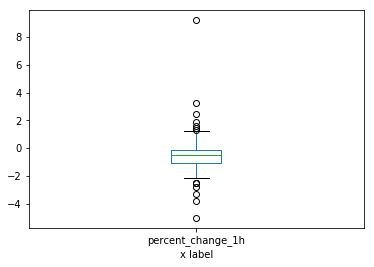

In [5]:
import pandas as pd
import requests

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)

# Convertendo os tipos para float
cols = ['percent_change_1h', 'percent_change_24h', 'percent_change_7d']
df[cols] = df[cols].astype(float)

# Plots
df.percent_change_1h.plot(kind='box')

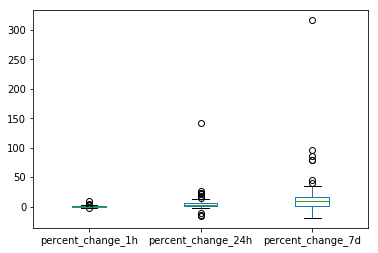

In [8]:
import pandas as pd
import requests

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)

# Convertendo os tipos para float
cols = ['percent_change_1h', 'percent_change_24h', 'percent_change_7d']
df[cols] = df[cols].astype(float)

# Plots
df[['percent_change_1h', 'percent_change_24h', 'percent_change_7d']].plot(kind='box')

,24h_volume_brl,24h_volume_usd,available_supply,id,last_updated,market_cap_brl,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_brl,price_btc,price_usd,rank,symbol,total_supply
0,37115696289.3,9733000162.13,17585212.0,bitcoin,1552438768,262260338883,68773596512.0,21000000.0,Bitcoin,0.01,0.45,0.68,14913.6865045,1.0,3910.87673621,1,BTC,17585212.0
1,17886521825.5,4690455446.95,105211994.0,ethereum,1552438760,53911738955.0,14137494819.0,None,Ethereum,-0.05,0.53,-1.98,512.410579609,0.03439459,134.371512676,2,ETH,105211994.0
2,2185349002.49,573072967.02,41432141931.0,ripple,1552438744,49082795982.0,12871181441.0,100000000000,XRP,0.10,0.09,-1.17,1.1846550454,0.00007952,0.3106569161,3,XRP,99991683860.0
3,6217667504.31,1630484266.17,60854211.0,litecoin,1552438746,13199715501.0,3461415141.0,84000000.0,Litecoin,-0.19,3.08,7.88,216.907181569,0.01455948,56.8804534051,4,LTC,60854211.0
4,6906445078.41,1811105213.93,906245118.0,eos,1552438745,12645735848.0,3316142801.0,None,EOS,-0.13,2.15,-1.65,13.9539905953,0.00093664,3.6592117703,5,EOS,1006245120.0
5,877214296.215,230035476.655,17669213.0,bitcoin-cash,1552438746,8681494812.0,2276583733.0,21000000.0,Bitcoin Cash,-0.12,-0.68,-2.66,491.334563559,0.0329799,128.844663172,6,BCH,17669213.0
6,647246244.672,169730018.137,141175490.0,binance-coin,1552438744,8229914807.0,2158164070.0,None,Binance Coin,-0.67,5.71,13.20,58.2956346922,0.00391298,15.287101648,7,BNB,189175490.0
7,30756203471.7,8065324466.6,1996357066.0,tether,1552438752,7665762606.0,2010224141.0,None,Tether,0.00,-0.28,-0.46,3.8398755098,0.00025774,1.0069461898,8,USDT,2580057493.0
8,566403425.963,148530276.618,19215577246.0,stellar,1552438744,7575472445.0,1986546984.0,None,Stellar,-1.10,2.94,20.95,0.394236007,0.00002646,0.1033821133,9,XLM,104802391119
9,381967537.227,100164902.546,66682072191.0,tron,1552438746,5700800707.0,1494944181.0,None,TRON,0.06,1.24,-5.39,0.0854922548,0.00000574,0.0224189821,10,TRX,99281283754.0


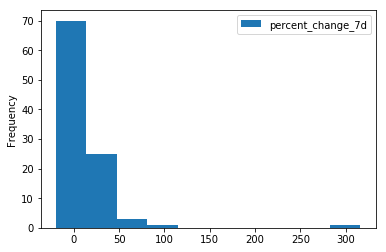

In [12]:
import pandas as pd
import requests

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)

# Convertendo os tipos para float
cols = ['percent_change_1h', 'percent_change_24h', 'percent_change_7d']
df[cols] = df[cols].astype(float)

# Plots
df[['percent_change_7d']].plot(kind='hist')
df

# Exercício

Objetivos:

- Plotar um gráfico de barras com os preço em bitcoin das 20 primeiras criptomoedas do dataset utilizando o pacote seaborn
- Plotar o gráfico horizontal

*Tempo: 10 minutos*

In [ ]:
import pandas as pd
import requests
import seaborn as sns

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)

# Convertendo para o tipo float

# Plot horizontal


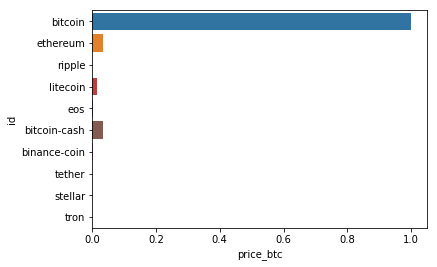

In [13]:
import pandas as pd
import requests
import seaborn as sns

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)

# Convertendo para o tipo float
df['price_btc'] = df['price_btc'].astype(float)

# plot horizontal
ay = sns.barplot(x="price_btc", y="id", data=df[:10])

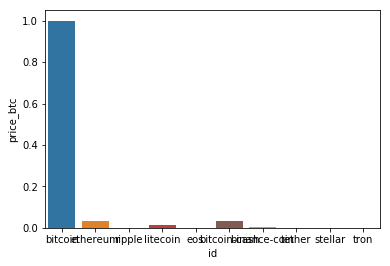

In [14]:
import pandas as pd
import requests
import seaborn as sns

# Obtendo os dados a partir da API
api = requests.get('https://api.coinmarketcap.com/v1/ticker/?convert=BRL')
json = api.json()

# Criando um pandas Dataframe
df = pd.DataFrame.from_records(json)

# Convertendo para o tipo float
df['price_btc'] = df['price_btc'].astype(float)

# plot horizontal
ay = sns.barplot(x='id', y="price_btc", data=df[:10])

# Outras APIs para estudo

- https://jobs.github.com/api
- http://quotesondesign.com/wp-json/posts?filter[orderby]=rand&filter[posts_per_page]=25
- https://carbon-intensity.github.io/api-definitions/
- http://www.recipepuppy.com/about/api/
- https://app.swaggerhub.com/apis/Bandsintown/PublicAPI/3.0.0

# Dúvidas?

<center>
<img src="https://unmeritedlove.files.wordpress.com/2013/11/doubt.jpg?w=334&h=209" alt="drawing" width="500px"></center>